# Tanmay Kapoor PE42

### Problem Statement number : 8

Perform the following operations using Python on the Facebook data sets

1. Handling Missing / noisy Values : Dropna, Fillna, replace, data smoothing(Binning) 

2. Data Reduction: Histogram(equi-frequency), feature selection (PCA)

3. Data Discretization : histogram (equi-width) , correlation Matrix


In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [31]:
dataset = pd.read_csv("dataset_Facebook.csv", sep=";")
dataset.head()

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0,139441,Photo,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,Status,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,Photo,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,Photo,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,Photo,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393


In [32]:
dataset.shape

(500, 19)

In [33]:
dataset.columns

Index(['Page total likes', 'Type', 'Category', 'Post Month', 'Post Weekday',
       'Post Hour', 'Paid', 'Lifetime Post Total Reach',
       'Lifetime Post Total Impressions', 'Lifetime Engaged Users',
       'Lifetime Post Consumers', 'Lifetime Post Consumptions',
       'Lifetime Post Impressions by people who have liked your Page',
       'Lifetime Post reach by people who like your Page',
       'Lifetime People who have liked your Page and engaged with your post',
       'comment', 'like', 'share', 'Total Interactions'],
      dtype='object')

In [34]:
dataset.isnull().sum()

Page total likes                                                       0
Type                                                                   0
Category                                                               0
Post Month                                                             0
Post Weekday                                                           0
Post Hour                                                              0
Paid                                                                   1
Lifetime Post Total Reach                                              0
Lifetime Post Total Impressions                                        0
Lifetime Engaged Users                                                 0
Lifetime Post Consumers                                                0
Lifetime Post Consumptions                                             0
Lifetime Post Impressions by people who have liked your Page           0
Lifetime Post reach by people who like your Page   

In [35]:
dataset["Paid"].fillna(0.0, inplace=True)
dataset.Paid.isnull().sum()

0

In [36]:
dataset.dropna(subset=['like'], inplace=True)
dataset.like.isnull().sum()

0

In [37]:
dataset.fillna({'share':0}, inplace=True)
dataset.share.isnull().sum()

0

In [38]:
dataset.isnull().sum()

Page total likes                                                       0
Type                                                                   0
Category                                                               0
Post Month                                                             0
Post Weekday                                                           0
Post Hour                                                              0
Paid                                                                   0
Lifetime Post Total Reach                                              0
Lifetime Post Total Impressions                                        0
Lifetime Engaged Users                                                 0
Lifetime Post Consumers                                                0
Lifetime Post Consumptions                                             0
Lifetime Post Impressions by people who have liked your Page           0
Lifetime Post reach by people who like your Page   

## Data Reduction

### 1. Histogram (equi-frequncy)

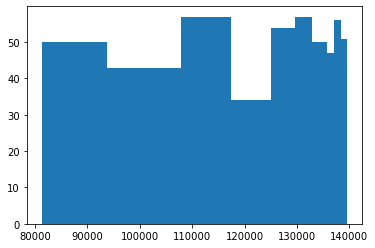

In [125]:
def equalObs(x, nbin):
    nlen = len(x)
    return np.interp(np.linspace(0, nlen, nbin + 1),
                     np.arange(nlen),
                     np.sort(x))

plt.hist(dataset["Page total likes"], equalObs(dataset['Page total likes'], 10))
plt.show()

### 2. Histogram (equi-width)

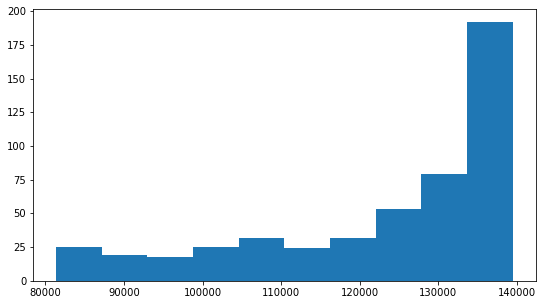

In [124]:
plt.figure(figsize = (9, 5))
plt.hist(x=dataset["Page total likes"])
plt.show()

In [46]:
corr = dataset.corr()
corr

,Page total likes,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
Page total likes,1.000000,-0.089576,0.941107,-0.006934,-0.143969,0.009549,-0.082398,-0.102028,-0.110589,-0.147900,-0.127247,-0.095766,-0.059390,0.035329,0.032508,0.053276,-0.007905,0.046209
Category,-0.089576,1.000000,-0.126070,-0.051449,-0.107422,-0.023959,-0.143423,-0.095222,0.001536,-0.033020,-0.151091,-0.048373,-0.106110,0.019656,0.027143,0.126786,0.152537,0.126326
Post Month,0.941107,-0.126070,1.000000,0.015437,-0.176599,-0.015495,-0.101620,-0.101068,-0.114471,-0.145757,-0.141782,-0.094259,-0.090843,0.012671,0.006815,0.025633,-0.024864,0.019387
Post Weekday,-0.006934,-0.051449,0.015437,1.000000,0.045829,-0.000737,-0.049194,-0.033052,-0.046818,-0.028067,-0.020342,-0.046029,-0.067520,0.002871,-0.076637,-0.082322,-0.052609,-0.080120
Post Hour,-0.143969,-0.107422,-0.176599,0.045829,1.000000,-0.068270,0.003380,0.012775,0.003948,0.012295,0.078846,0.038912,0.052492,0.038114,0.000948,-0.024523,-0.059015,-0.027388
Paid,0.009549,-0.023959,-0.015495,-0.000737,-0.068270,1.000000,0.146490,0.062483,0.116426,0.097055,0.097064,0.003170,0.109881,0.053623,0.075761,0.110979,0.078982,0.107376
Lifetime Post Total Reach,-0.082398,-0.143423,-0.101620,-0.049194,0.003380,0.146490,1.000000,0.694832,0.570265,0.477450,0.323852,0.322097,0.742866,0.400185,0.426946,0.545185,0.457521,0.538310
Lifetime Post Total Impressions,-0.102028,-0.095222,-0.101068,-0.033052,0.012775,0.062483,0.694832,1.000000,0.368255,0.314858,0.225726,0.850771,0.651839,0.323497,0.316439,0.345091,0.287776,0.343109
Lifetime Engaged Users,-0.110589,0.001536,-0.114471,-0.046818,0.003948,0.116426,0.570265,0.368255,1.000000,0.968165,0.676473,0.260125,0.611598,0.839007,0.505642,0.569565,0.532469,0.571795
Lifetime Post Consumers,-0.147900,-0.033020,-0.145757,-0.028067,0.012295,0.097055,0.477450,0.314858,0.968165,1.000000,0.706341,0.222691,0.503240,0.813210,0.334300,0.349152,0.344612,0.353910


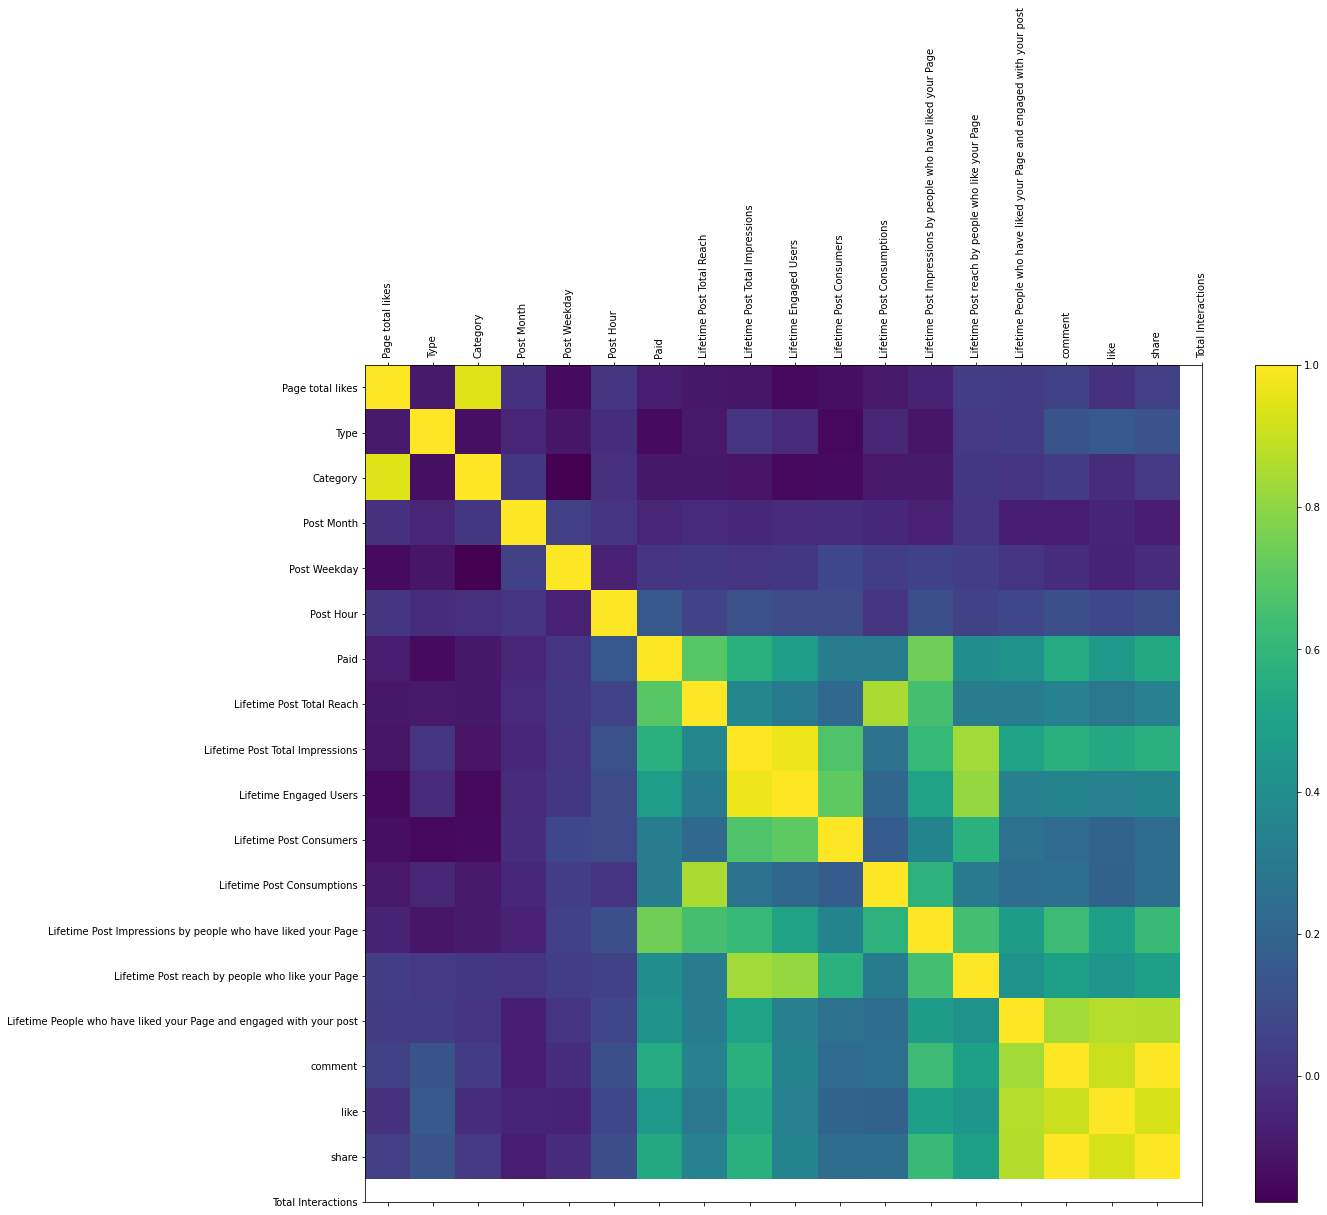

In [47]:
plt.figure(figsize=(19, 15))
plt.matshow(corr, fignum=1)
plt.xticks(range(len(dataset.columns)), dataset.columns, rotation=90)
plt.yticks(range(len(dataset.columns)), dataset.columns)
plt.colorbar()
plt.show()

## Binning (by mean)

In [69]:
data  = np.sort(dataset["Lifetime Post Total Reach"])
print(data[:100])
n = len(data)
n

[ 238  391  452  584  617  619  645  652  659  677  677  729  747  754
  786  813  834  861  910 1006 1060 1080 1101 1228 1330 1357 1384 1388
 1445 1531 1536 1543 1591 1592 1659 1673 1683 1685 1711 1722 1728 1729
 1804 1809 1845 1874 1920 1925 1954 2055 2149 2168 2219 2225 2227 2232
 2232 2257 2291 2295 2316 2351 2352 2360 2363 2402 2413 2425 2426 2428
 2431 2478 2522 2540 2545 2549 2566 2585 2594 2602 2626 2628 2645 2645
 2656 2690 2718 2723 2752 2763 2772 2790 2812 2819 2822 2823 2847 2848
 2881 2933]


499

In [123]:
bins = np.zeros([int(n/5), 5])
for i in range(0, n-5, 5):
    sum = 0
    for j in range(5):
        sum += data[i+j]
    for j in range(5):
        bins[int(i/5), j] = round(sum/5)
bins[:10]

array([[ 456.,  456.,  456.,  456.,  456.],
       [ 650.,  650.,  650.,  650.,  650.],
       [ 739.,  739.,  739.,  739.,  739.],
       [ 885.,  885.,  885.,  885.,  885.],
       [1160., 1160., 1160., 1160., 1160.],
       [1421., 1421., 1421., 1421., 1421.],
       [1584., 1584., 1584., 1584., 1584.],
       [1695., 1695., 1695., 1695., 1695.],
       [1783., 1783., 1783., 1783., 1783.],
       [1946., 1946., 1946., 1946., 1946.]])